In [130]:
## MACD-Hist Divergence Trading Strategy 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

df_original = pd.read_csv('../data/df_BCC-2017-01-01-2018-10-08-FREQ-1h.csv')


print(df_original.columns)



Index(['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume',
       'taker_buy_quote_asset_volume', 'ignored'],
      dtype='object')


In [131]:
df_original.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignored
0,2017-11-11 08:00:00,802.00,949.99,802.00,949.99,1.27318,2017-11-11 08:59:59,1061.518268,3,0.27318,259.518268,34457.458392
1,2017-11-11 09:00:00,949.99,1000.00,949.99,957.00,34.81915,2017-11-11 09:59:59,34053.555751,24,18.60699,18518.633351,34498.810875
2,2017-11-11 10:00:00,960.00,999.98,960.00,999.98,37.22461,2017-11-11 10:59:59,36962.740410,28,14.16895,14128.970880,34088.280523
3,2017-11-11 11:00:00,999.98,1110.00,961.24,1100.00,163.51885,2017-11-11 11:59:59,173083.225118,139,138.22815,146621.977681,34108.839241
4,2017-11-11 12:00:00,1100.00,1245.00,1065.30,1229.90,164.62483,2017-11-11 12:59:59,190853.126580,172,102.61965,118832.688231,34015.004558


In [132]:
df_original = df_original[['open', 'high', 'low', 'close', 'volume']]

In [133]:
df_original.head()

,open,high,low,close,volume
0,802.00,949.99,802.00,949.99,1.27318
1,949.99,1000.00,949.99,957.00,34.81915
2,960.00,999.98,960.00,999.98,37.22461
3,999.98,1110.00,961.24,1100.00,163.51885
4,1100.00,1245.00,1065.30,1229.90,164.62483


In [134]:
## Trying the MACD-hist strategy

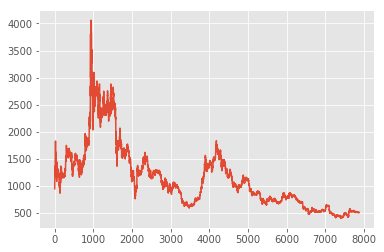

In [135]:
df_original.close.plot()

In [136]:
def EMA(values, window):
    """ Numpy implementation of EMA
    """
    weights = np.exp(np.linspace(-1., 0., window))
    weights /= weights.sum()
    a =  np.convolve(values, weights, mode='full')[:len(values)]
    a[:window] = a[window]
    return a
    
def MACD(x, nslow=26, nfast=12):
    emaslow = EMA(x, nslow)
    emafast = EMA(x, nfast)
    macd = emafast - emaslow
    signal = EMA(macd, 9)
    hist = macd - signal
    return macd, signal,hist

In [96]:
len(df_original)

9938

In [171]:
df = df_original[7000:]

In [172]:
df.reset_index(drop=True, inplace=True)

In [173]:
len(df)

877

In [174]:
df.head()

,open,high,low,close,volume
0,549.68,555.91,549.12,553.70,1174.33011
1,554.50,556.07,551.36,554.32,1016.54409
2,553.79,555.22,550.53,552.70,1044.89075
3,552.81,555.31,551.62,554.81,790.11164
4,554.83,557.38,553.89,554.93,1017.27723


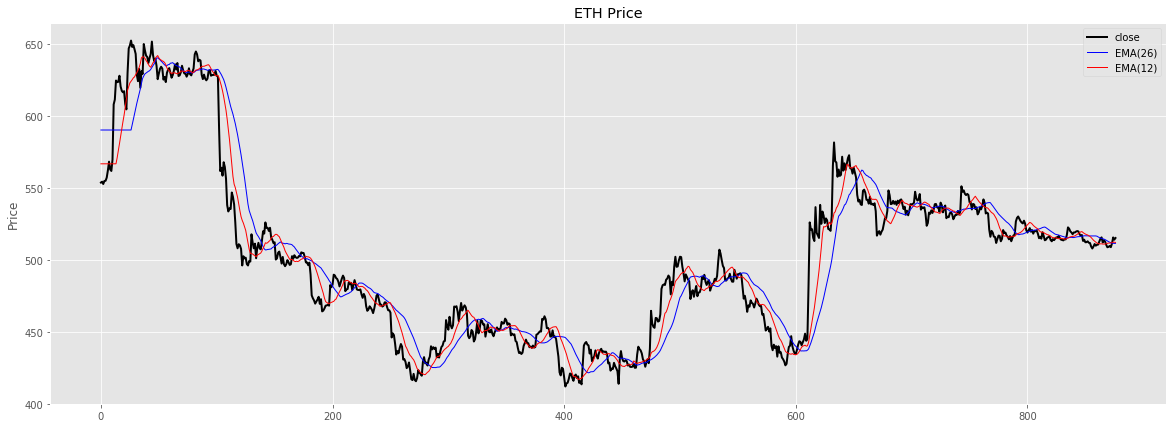

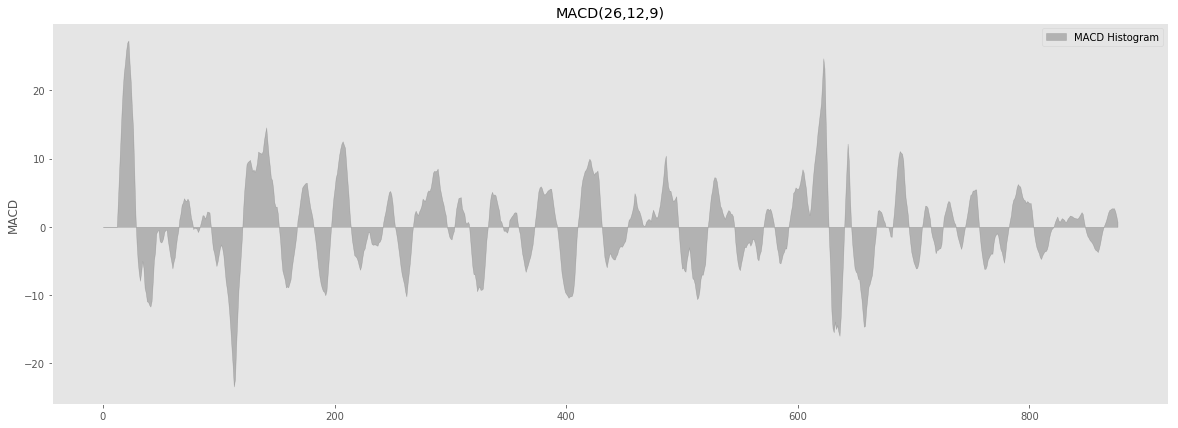

In [175]:

# compute the MACD datapoints
macd, signal,hist = MACD(df['close'])

emaslow = EMA(df['close'], 26)
emafast = EMA(df['close'], 13)


# draw the MACD lines and histogram
f1, ax1 = plt.subplots(figsize=(20,7))
ax1.plot(df.index, df['close'], color = 'black', lw=2, label='close')
ax1.plot(df.index, emaslow, color ='blue', lw=1, label='EMA(26)')
ax1.plot(df.index, emafast, color ='red', lw=1, label='EMA(12)')

f2, ax2 = plt.subplots(figsize=(20,7))
#ax2.plot(df.index, macd, color='green', lw=1,label='MACD Line(26,12)')
#ax2.plot(df.index, signal, color='purple', lw=1, label='Signal Line(9)')

# set other parameters
ax1.legend(loc='upper right')
ax1.set(title = 'ETH Price', ylabel = 'Price')
ax2.fill_between(df.index, hist, color = 'gray', alpha=0.5, label='MACD Histogram')
ax2.set(title = 'MACD(26,12,9)', ylabel='MACD')
ax2.legend(loc = 'upper right')
ax2.grid(False)

plt.show()

In [176]:
len(hist)

877

### MACD-HIST DIVERGENCE STRATEGY

--------------------------------
Zone A, maximum at:  -1.853961387017586
Zone A, previous at:  -10.201867315106345
--------------------------------
Zone A, price at:  460.37
Zone A, price at:  430.96
--------------------------------
Zone A, maximum at:  -5.940895691309745
Zone A, previous at:  -10.403027798129926
--------------------------------
Zone A, price at:  435.9
Zone A, price at:  414.06


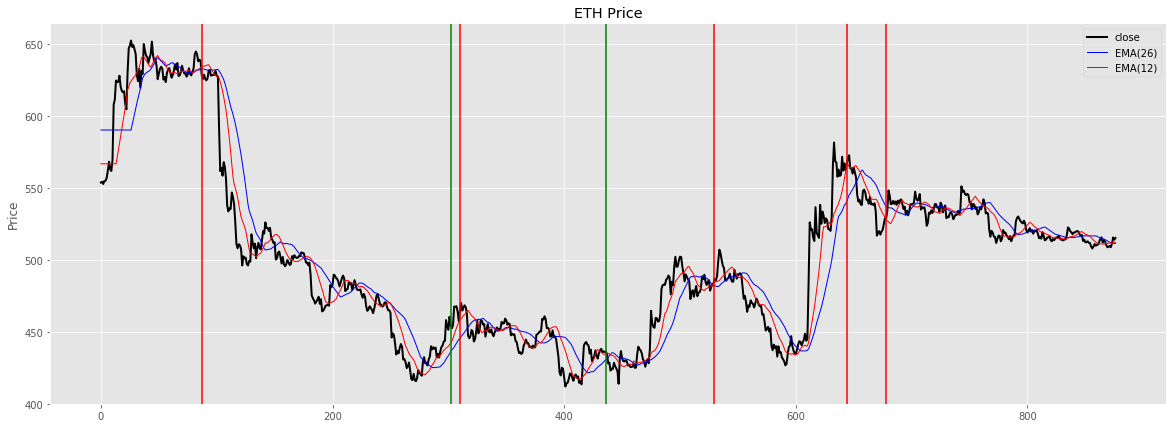

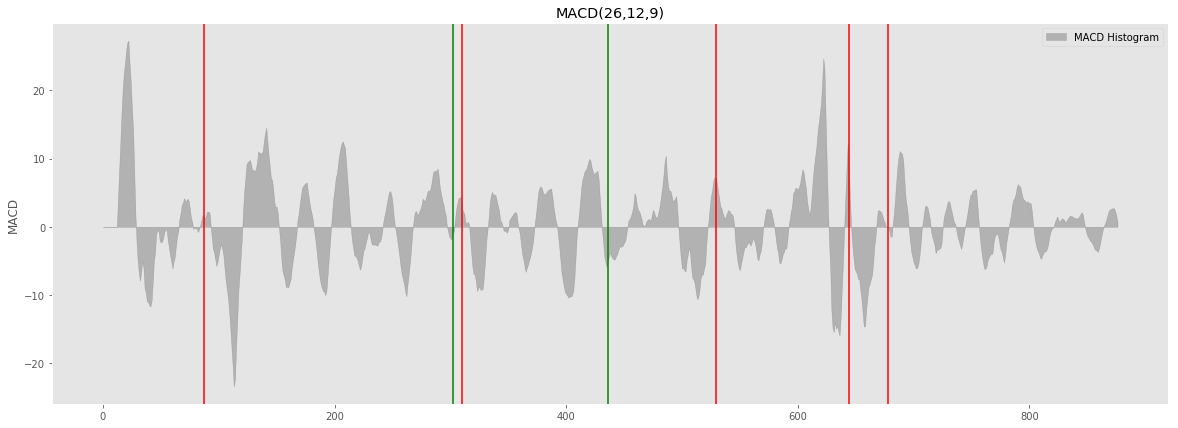

In [193]:
 
# compute the MACD datapoints
macd, signal,hist = MACD(df['close'])

emaslow = EMA(df['close'], 26)
emafast = EMA(df['close'], 13)


# draw the MACD lines and histogram
f1, ax1 = plt.subplots(figsize=(20,7))
ax1.plot(df.index, df['close'], color = 'black', lw=2, label='close')
ax1.plot(df.index, emaslow, color ='blue', lw=1, label='EMA(26)')
ax1.plot(df.index, emafast, color ='red', lw=1, label='EMA(12)')

f2, ax2 = plt.subplots(figsize=(20,7))
#ax2.plot(df.index, macd, color='green', lw=1,label='MACD Line(26,12)')
#ax2.plot(df.index, signal, color='purple', lw=1, label='Signal Line(9)')

# set other parameters
ax1.legend(loc='upper right')
ax1.set(title = 'ETH Price', ylabel = 'Price')
ax2.fill_between(df.index, hist, color = 'gray', alpha=0.5, label='MACD Histogram')
ax2.set(title = 'MACD(26,12,9)', ylabel='MACD')
ax2.legend(loc = 'upper right')
ax2.grid(False) 
##############################################################3

#hist = macd_line - signal_line
div = pd.Series([0 for i in range(len(df))])


### Variables:

    # Zones of the MACD-hist Divergence
a = False
b = False

    # Max and Min of the zones
min_a = 0
max_b = 0

    # Prices of the zones
price_a = 0
price_b = 0


list_max_min = []

flag_bear_div = False
flag_bull_div = False

########################################### FUNCTION

for i in range(len(df)):
    
    if hist[i]<0:
        if b:
            list_max_min.append(['b', max_b, price_b])
            #print('--------------------------------')
            #print('Zone B, maximum at: ', max_b)
            #print('Zone B, price at: ', price_b)
            
        flag_bear_div = False                
        max_b = 0
        b = False
        a = True
        if hist[i]< min_a:
            min_a = hist[i]
            price_a = df.close[i]
        else:
            if len(list_max_min)<3:
                #print('List too short')
                pass
            else:
                #print(list_max_min[len(list_max_min)-2][0])
                if ((list_max_min[len(list_max_min)-2][0]) == 'a'):
                    #print('The Same')
                    #print('Anterior Valor: ', list_max_min[len(list_max_min)-2][1])
                    #print('Actual Valor: ', min_a)
                    if (list_max_min[len(list_max_min)-2][1]<min_a):
                        if (list_max_min[len(list_max_min)-2][2]<price_a*0.95):
                            if not flag_bull_div:
                                #print('Possible Bullish Divergence on the MACD-hist ###################################')
                                #print 'Possible Bearish Divergence on the MACD-hist ###################################')
                                print('--------------------------------')
                                print('Zone A, maximum at: ', min_a)
                                print('Zone A, previous at: ', list_max_min[len(list_max_min)-2][1])
                                print('--------------------------------')
                                print('Zone A, price at: ', price_a)
                                print('Zone A, price at: ', list_max_min[len(list_max_min)-2][2])
                                ax1.axvline(x=i, color = 'g')
                                ax2.axvline(x=i, color = 'g')
                                flag_bull_div = True
    
    
    if hist[i]>0:
        if a:
            list_max_min.append(['a', min_a, price_a])
            #print('--------------------------------')
            #print('Zone A, minimun at: ', min_a)
            
        flag_bull_div = False               
        min_a = 0
        b = True
        a = False
        if hist[i]> max_b:
            max_b = hist[i]
            price_b = df.close[i]
        elif (hist[i]< max_b):
            if len(list_max_min)<3:
                #print('List too short')
                pass
            else:
                #print(list_max_min[len(list_max_min)-2][0])
                if ((list_max_min[len(list_max_min)-2][0]) == 'b'):
                    #print('The Same')
                    #print('Anterior Valor: ', list_max_min[len(list_max_min)-2][1])
                    #print('Actual Valor: ', max_b)
                    if (list_max_min[len(list_max_min)-2][1])>(max_b):
                        if (list_max_min[len(list_max_min)-2][2])<(price_b):
                            if not flag_bear_div:
                                #print('Possible Bearish Divergence on the MACD-hist ###################################')
                                #print 'Possible Bullish Divergence on the MACD-hist ###################################')
                                ax1.axvline(x=i, color = 'r')
                                ax2.axvline(x=i, color = 'r')
                                flag_bear_div = True
                        
plt.show()

In [194]:
list_max_min

[['b', 27.275212177126082, 604.6],
 ['a', -11.689393705382974, 636.88],
 ['b', 4.177775380365841, 634.91],
 ['a', -0.7769106200175814, 644.81],
 ['b', 2.233483675767986, 625.98],
 ['a', -23.39657455243002, 546.81],
 ['b', 14.562064770469311, 518.22],
 ['a', -8.882940769039482, 497.0],
 ['b', 6.448805389151786, 501.88],
 ['a', -10.028321151875991, 464.71],
 ['b', 12.523363626168127, 484.12],
 ['a', -6.29788443030301, 479.04],
 ['b', 5.243077086325365, 464.96],
 ['a', -10.201867315106345, 430.96],
 ['b', 8.519347005414117, 438.95],
 ['a', -1.853961387017586, 460.37],
 ['b', 4.338446564679458, 457.44],
 ['a', -9.440992909549427, 444.75],
 ['b', 5.127036561740444, 449.57],
 ['a', -0.8610310976638645, 459.1],
 ['b', 2.1307169777667028, 447.84],
 ['a', -6.602514108375442, 440.13],
 ['b', 5.92432556432378, 449.26],
 ['a', -10.403027798129926, 414.06],
 ['b', 9.963417233509311, 441.05],
 ['a', -5.940895691309745, 435.9],
 ['b', 10.422609388574763, 482.86],
 ['a', -10.59719701243582, 478.29],
 